In [ ]:
from sklearn.metrics import (explained_variance_score, max_error, 
                             mean_absolute_error, mean_squared_error,
                             mean_squared_log_error, median_absolute_error,
                             r2_score, mean_poisson_deviance, mean_gamma_deviance)



In [ ]:
from sklearn.linear_model import Ridge
import numpy as np
n_samples, n_features = 3, 2
rng = np.random.RandomState(0)
rng = np.random.RandomState()
y = rng.randn(n_samples)
y

array([-1.29059155, -0.79823036,  0.59632261])

In [ ]:
def calulate_RSS_1D(X, y, b0, b1, alpha, norm):
  rss = np.sum((b0 + b1*X - y.reshape(-1, 1))**2) + alpha*(b0**2 + b1**2)
  return rss/norm

# Different arguments 
def calculate_RSS(y_true, y_pred):
  return ((y_pred - y_true)**2).sum()

In [ ]:
X = rng.randn(n_samples, n_features)
X

array([[ 0.65099038, -0.90249733],
       [-0.43236973,  1.08608967],
       [-0.68057384,  0.23692134]])

In [ ]:
reg = Ridge(alpha=1.0)
reg.fit(X, y)
reg

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
reg.coef_

array([-0.56530248, -0.00128368])

In [ ]:
reg.intercept_

-0.5843675934444633

In [ ]:
y_pred = reg.predict(X)

In [ ]:
mean_squared_error(y, y_pred)

0.31931990125269627

Now basic regression with the same data. With no regularization

In [ ]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
linReg.fit(X, y)
linReg.coef_

array([-2.25767133, -0.98236077])

In [ ]:
linReg.intercept_

-0.7074472117950206

In [ ]:
linReg.rank_

2

In [ ]:
linReg.score(X, y)

1.0

In [ ]:
1.48846285*1.48846285

2.215521655830122

In [ ]:
X

array([[ 0.65099038, -0.90249733],
       [-0.43236973,  1.08608967],
       [-0.68057384,  0.23692134]])

In [ ]:
y

array([-1.29059155, -0.79823036,  0.59632261])

In [ ]:
y_pred = linReg.predict(X)
explained_variance_score(y, y_pred)

1.0

In [ ]:
max_error(y, y_pred)

4.440892098500626e-16

In [ ]:
mean_absolute_error(y, y_pred)

4.070817756958907e-16

In [ ]:
mean_squared_error(y, y_pred)

1.6845467246907022e-31

In [ ]:
calculate_RSS(y, y_pred)

5.053640174072107e-31

In [ ]:
#mean_squared_log_error(y, y_pred)

In [ ]:
median_absolute_error(y, y_pred)

4.440892098500626e-16

In [ ]:
r2_score(y, y_pred)

1.0

In [ ]:
#mean_gamma_deviance(y, y_pred)

In [ ]:
(reg.coef_, reg.intercept_), (linReg.coef_, linReg.intercept_)

((array([-0.56530248, -0.00128368]), -0.5843675934444633),
 (array([-2.25767133, -0.98236077]), -0.7074472117950206))

In [ ]:
def radius(centr, point):
  return np.sqrt((point[0] - centr[0])**2 + (point[1]-centr[1])**2)

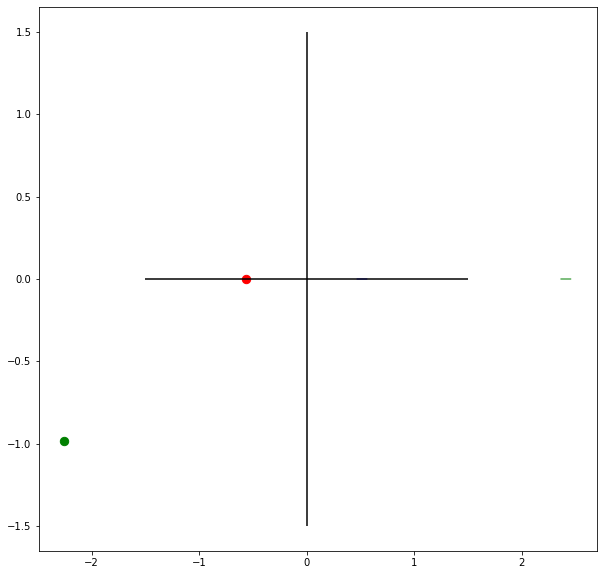

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge

ridge_coef = Wedge((0,0), theta1=0, theta2=0, width=0.1, r=radius((0, 0), (reg.coef_)))
ridge_coef.set_facecolor("white")
ridge_coef.set_edgecolor("b")

lr_coef = Wedge((0,0), theta1=0, theta2=0, width=0.1, r=radius((0, 0), (linReg.coef_)))
lr_coef.set_facecolor("white")
lr_coef.set_edgecolor("g")


fig, ax = plt.subplots(figsize=(10,10))
#ax.set_clip_on(False)
ax.add_patch(lr_coef)
ax.add_patch(ridge_coef)

ax.scatter(reg.coef_[0], reg.coef_[1], c="r", s=70)
ax.scatter(linReg.coef_[0], linReg.coef_[1], c="g", s=70)
ax.vlines(0, -1.5, 1.5)
ax.hlines(0, -1.5, 1.5)

#ax.set_xlim(-1.5, 1.5)
#ax.set_ylim(-1.5, 1.5)
plt.show()

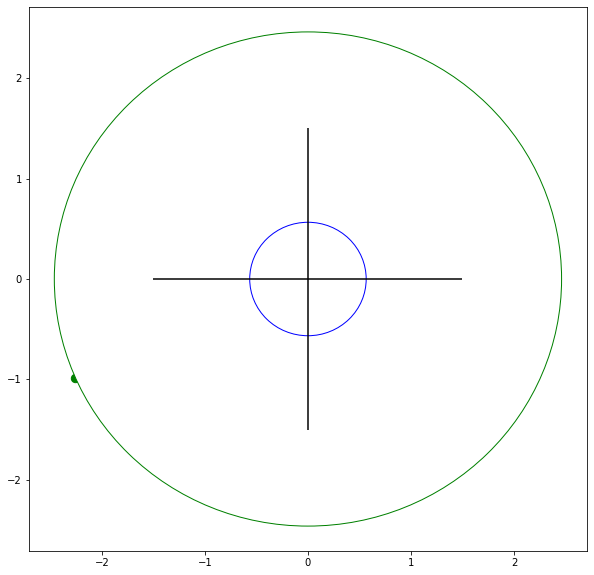

In [ ]:
ridge_coef = plt.Circle((0,0), radius=radius((0, 0), (reg.coef_)))
ridge_coef.set_facecolor("white")
ridge_coef.set_edgecolor("b")

lr_coef = plt.Circle((0,0), radius=radius((0, 0), (linReg.coef_)))
lr_coef.set_facecolor("white")
lr_coef.set_edgecolor("g")


fig, ax = plt.subplots(figsize=(10,10))
#ax.set_clip_on(False)
ax.add_patch(lr_coef)
ax.add_patch(ridge_coef)

ax.scatter(reg.coef_[0], reg.coef_[1], c="b", s=70)
ax.scatter(linReg.coef_[0], linReg.coef_[1], c="g", s=70)
ax.vlines(0, -1.5, 1.5)
ax.hlines(0, -1.5, 1.5)

#ax.set_xlim(-1.5, 1.5)
#ax.set_ylim(-1.5, 1.5)
plt.show()